<a href="https://colab.research.google.com/github/madisynk21/CollegeHappinessScore/blob/main/College_Happiness_Score_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
from google.colab import drive
drive.mount('/content/drive/')

import pandas as pd
import seaborn as sns
import numpy as np

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Read in data


In [35]:
y_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/y_train.csv")

In [36]:
df_test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_test.csv')

In [37]:
df_train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/X_train.csv')
df_train

,Unnamed: 0,ADMrate,Ownership,Citytype,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,...,Major_SocialScience,Major_Business,Major_History,Earn,CrimeRate,ACT,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Application.Deadline
0,45,0.3072,Private nonprofit,Town,1317.0,61060.0,0,1,0,1,...,1,1,1,63800,314.1,30.0,3528.0,176,5.47,15-Jan-19
1,8,0.2391,Private nonprofit,City,NaN,62849.0,0,1,0,1,...,1,0,1,46500,236.9,NaN,2907.0,1580,3.37,1-Jan-19
2,55,0.1425,Private nonprofit,Suburb,1500.0,63860.0,0,0,0,1,...,1,0,0,82100,396.1,34.0,802.0,10598,6.86,1-Jan-19
3,209,0.3806,Public,City,1130.0,14824.0,0,1,1,1,...,1,1,1,42200,381.8,NaN,12175.0,359896,4.21,1-Feb-19
4,40,0.3224,Public,City,1380.0,26143.0,0,1,1,1,...,1,1,1,65800,427.3,31.0,28217.0,5184,4.37,1-Feb-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,38,0.2624,Private nonprofit,Town,1369.0,60050.0,0,1,0,1,...,1,0,1,62600,381.8,31.0,2865.0,5090,8.33,15-Jan-19
178,132,0.6721,Private nonprofit,Town,NaN,61920.0,0,1,1,1,...,1,0,1,30900,99.3,NaN,631.0,748,4.87,3-Jan-19
179,134,0.4812,Private nonprofit,City,1254.0,59105.0,0,0,0,1,...,1,1,1,53400,381.8,28.0,8485.0,359896,4.21,1-Jan-19
180,42,0.1856,Public,City,1330.0,32074.0,0,1,1,1,...,1,1,1,58800,396.1,30.0,29627.0,237318,5.99,30-Nov-18


In [38]:
df_train.dtypes

Unnamed: 0                int64
ADMrate                 float64
Ownership                object
Citytype                 object
SAT                     float64
AvgCost                 float64
Major_agriculture         int64
Major_NatureResource      int64
Major_Architecture        int64
Major_CS                  int64
Major_Edu                 int64
Major_Engineering         int64
Major_Bio                 int64
Major_MathStat            int64
Major_Psychology          int64
Major_SocialScience       int64
Major_Business            int64
Major_History             int64
Earn                     object
CrimeRate               float64
ACT                     float64
Enrollment              float64
FBI.TotalCrime            int64
FBI.CrimeRate           float64
Application.Deadline     object
dtype: object

In [39]:
len(df_test)

90

In [40]:
len(df_test.columns)

25

### Fill in null values with averages for test data and train data

In [41]:
admRateAverage = df_train['ADMrate'].mean()
admRate = df_train['ADMrate'].fillna(value = admRateAverage)
df_train["ADMrate"] = admRate
df_train

admRateAverage1 = df_test['ADMrate'].mean()
admRate1 = df_test['ADMrate'].fillna(value = admRateAverage1)
df_test["ADMrate"] = admRate1
admRateAverage1


0.5258255813953489

In [42]:
SATAverage = df_train['SAT'].mean().round()
sat = df_train['SAT'].fillna(value = SATAverage)
df_train['SAT'] = sat

SATAverage1 = df_test['SAT'].mean().round()
sat1 = df_test['SAT'].fillna(value = SATAverage1)
df_test['SAT'] = sat1
df_test

,Unnamed: 0,ADMrate,Ownership,Citytype,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,...,Major_SocialScience,Major_Business,Major_History,Earn,CrimeRate,ACT,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Application.Deadline
0,14,0.069500,Private nonprofit,City,1470.0,64144.0,0,1,1,1,...,1,1,1,92100,381.8,33.0,8100.0,359896,4.21,1-Jan-19
1,109,0.453500,Public,City,1271.0,24551.0,1,1,1,2,...,1,2,1,49900,229.1,28.0,30135.0,43472,10.51,31-Jan-19
2,159,0.525826,Public,City,1245.0,NaN,0,0,0,0,...,0,0,0,83000,514.7,NaN,911.0,37958,9.65,30-Nov-18
3,162,0.657300,Public,City,1153.0,22601.0,0,0,0,1,...,1,1,1,53100,196.2,26.0,18697.0,2714,5.10,15-Jan-19
4,253,0.543800,Private nonprofit,City,1159.0,47404.0,0,1,0,1,...,1,1,1,43900,405.9,25.0,1272.0,2738,6.79,1-Mar-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,98,0.773900,Private nonprofit,City,1194.0,49150.0,0,1,0,1,...,1,1,1,50000,497.7,27.0,1654.0,5526,14.66,1-Feb-19
86,142,0.476400,Private nonprofit,Town,1245.0,59550.0,0,1,0,1,...,1,1,1,47800,381.8,NaN,2282.0,68,1.02,1-Feb-19
87,62,0.160800,Private nonprofit,City,1439.0,61481.0,0,1,0,1,...,1,1,1,73700,446.1,33.0,6039.0,80966,13.03,1-Jan-19
88,203,0.746200,Public,City,1245.0,24617.0,1,1,1,1,...,1,1,1,46200,399.9,NaN,32646.0,77314,14.60,1-May-19


In [43]:
avgCostAverage = df_train['AvgCost'].mean().round()
avgCost = df_train['AvgCost'].fillna(value = avgCostAverage)
df_train['AvgCost'] = avgCost

avgCostAverage1 = df_test['AvgCost'].mean().round()
avgCost1 = df_test['AvgCost'].fillna(value = avgCostAverage1)
df_test['AvgCost'] = avgCost1


In [44]:
actAverage = df_train['ACT'].mean().round()
act = df_train['ACT'].fillna(value=actAverage)
df_train['ACT'] = act
df_train

actAverage1 = df_test['ACT'].mean().round()
act1 = df_test['ACT'].fillna(value=actAverage1)
df_test['ACT'] = act1
df_test

,Unnamed: 0,ADMrate,Ownership,Citytype,SAT,AvgCost,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,...,Major_SocialScience,Major_Business,Major_History,Earn,CrimeRate,ACT,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Application.Deadline
0,14,0.069500,Private nonprofit,City,1470.0,64144.0,0,1,1,1,...,1,1,1,92100,381.8,33.0,8100.0,359896,4.21,1-Jan-19
1,109,0.453500,Public,City,1271.0,24551.0,1,1,1,2,...,1,2,1,49900,229.1,28.0,30135.0,43472,10.51,31-Jan-19
2,159,0.525826,Public,City,1245.0,45276.0,0,0,0,0,...,0,0,0,83000,514.7,28.0,911.0,37958,9.65,30-Nov-18
3,162,0.657300,Public,City,1153.0,22601.0,0,0,0,1,...,1,1,1,53100,196.2,26.0,18697.0,2714,5.10,15-Jan-19
4,253,0.543800,Private nonprofit,City,1159.0,47404.0,0,1,0,1,...,1,1,1,43900,405.9,25.0,1272.0,2738,6.79,1-Mar-19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,98,0.773900,Private nonprofit,City,1194.0,49150.0,0,1,0,1,...,1,1,1,50000,497.7,27.0,1654.0,5526,14.66,1-Feb-19
86,142,0.476400,Private nonprofit,Town,1245.0,59550.0,0,1,0,1,...,1,1,1,47800,381.8,28.0,2282.0,68,1.02,1-Feb-19
87,62,0.160800,Private nonprofit,City,1439.0,61481.0,0,1,0,1,...,1,1,1,73700,446.1,33.0,6039.0,80966,13.03,1-Jan-19
88,203,0.746200,Public,City,1245.0,24617.0,1,1,1,1,...,1,1,1,46200,399.9,28.0,32646.0,77314,14.60,1-May-19


In [45]:
enrollmentAverage = df_train['Enrollment'].mean().round()
enrollment = df_train['Enrollment'].fillna(value = enrollmentAverage)
df_train['Enrollment'] = enrollment

enrollmentAverage1 = df_test['Enrollment'].mean().round()
enrollment1 = df_test['Enrollment'].fillna(value = enrollmentAverage1)
df_test['Enrollment'] = enrollment1

In [46]:
earn = df_train['Earn'].replace("PrivacySuppressed", np.NaN)
earnColumn = pd.DataFrame(earn, columns=['earnNulls'])
earnColumn.earnNulls=earn.astype('str').astype('float64')
df_trainEarn = pd.concat([df_train, earnColumn], axis='columns')
df_trainEarnDrop = df_trainEarn.drop(['Earn'], axis=1)
earnAverage = df_trainEarnDrop['earnNulls'].mean().round()
earnavg = df_trainEarnDrop['earnNulls'].fillna(value  = earnAverage)
df_train['Earn'] = earnavg

earn1 = df_test['Earn'].replace("PrivacySuppressed", np.NaN)
earnColumn1 = pd.DataFrame(earn1, columns=['earnNulls'])
earnColumn1.earnNulls=earn1.astype('str').astype('float64')
df_testEarn = pd.concat([df_test, earnColumn1], axis='columns')
df_testEarnDrop = df_testEarn.drop(['Earn'], axis=1)
earnAverage1 = df_testEarnDrop['earnNulls'].mean().round()
earnavg1 = df_testEarnDrop['earnNulls'].fillna(value  = earnAverage1)
df_test['Earn'] = earnavg1

<Axes: xlabel='Ownership', ylabel='HappyScore'>

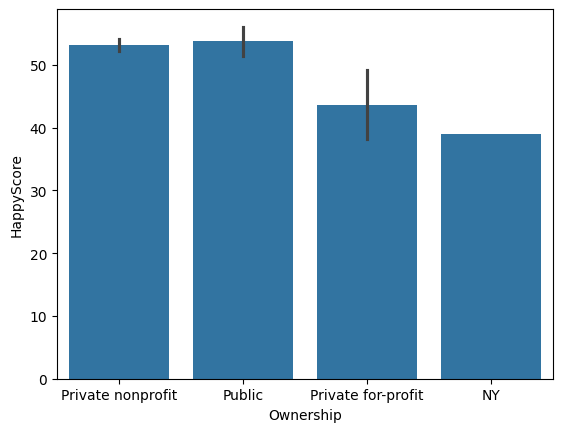

In [47]:
happiness = y_train['HappyScore']
df_explore = df_train.join(happiness)
sns.barplot(x='Ownership', y ="HappyScore", data = df_explore)

<Axes: xlabel='HappyScore', ylabel='Citytype'>

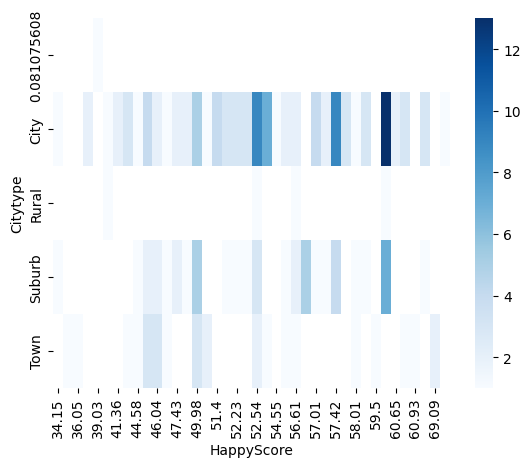

In [48]:
adm = df_explore.groupby('Citytype').HappyScore.value_counts().unstack()
sns.heatmap(adm, cmap='Blues')

In [49]:
df_explore.columns

Index(['Unnamed: 0', 'ADMrate', 'Ownership', 'Citytype', 'SAT', 'AvgCost',
       'Major_agriculture', 'Major_NatureResource', 'Major_Architecture',
       'Major_CS', 'Major_Edu', 'Major_Engineering', 'Major_Bio',
       'Major_MathStat', 'Major_Psychology', 'Major_SocialScience',
       'Major_Business', 'Major_History', 'Earn', 'CrimeRate', 'ACT',
       'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate', 'Application.Deadline',
       'HappyScore'],
      dtype='object')

### One hot encoding ownership column for both test and training data


In [50]:
gdummies_train = pd.get_dummies(df_train.Ownership).drop(['NY'], axis=1)


gdummies_test = pd.get_dummies(df_test.Ownership)

gdummies_train

,Private for-profit,Private nonprofit,Public
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
177,0,1,0
178,0,1,0
179,0,1,0
180,0,0,1


In [51]:
merged_train = pd.concat([df_train,gdummies_train],axis='columns')

merged_test = pd.concat([df_test,gdummies_test],axis='columns')

In [52]:
dropped_train = merged_train.drop(['Ownership'],axis='columns')

dropped_test = merged_test.drop(['Ownership'],axis='columns')

###One hot encoding city type column for traing and testing data

In [53]:
gdummies_train1 = pd.get_dummies(dropped_train.Citytype).drop(['0.081075608'], axis=1)

gdummies_test1 = pd.get_dummies(dropped_test.Citytype)
gdummies_train1

,City,Rural,Suburb,Town
0,0,0,0,1
1,1,0,0,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
177,0,0,0,1
178,0,0,0,1
179,1,0,0,0
180,1,0,0,0


In [54]:
merged_train1 = pd.concat([dropped_train,gdummies_train1],axis='columns')

merged_test1 = pd.concat([dropped_test,gdummies_test1],axis='columns')

In [55]:
dropped_train1 = merged_train1.drop(['Citytype'],axis='columns')

dropped_test1 = merged_test1.drop(['Citytype'],axis='columns')

In [56]:
x_train = dropped_train1.drop(['Application.Deadline'], axis='columns')
x_test0 = dropped_test1.drop(['Application.Deadline'], axis='columns')


x_train.isna().sum()

Unnamed: 0              0
ADMrate                 0
SAT                     0
AvgCost                 0
Major_agriculture       0
Major_NatureResource    0
Major_Architecture      0
Major_CS                0
Major_Edu               0
Major_Engineering       0
Major_Bio               0
Major_MathStat          0
Major_Psychology        0
Major_SocialScience     0
Major_Business          0
Major_History           0
Earn                    0
CrimeRate               0
ACT                     0
Enrollment              0
FBI.TotalCrime          0
FBI.CrimeRate           0
Private for-profit      0
Private nonprofit       0
Public                  0
City                    0
Rural                   0
Suburb                  0
Town                    0
dtype: int64

### Correlation between variables and happy score

In [57]:
happiness = y_train['HappyScore']
joined = x_train.join(happiness)
joined.corr(numeric_only = True)['HappyScore']

Unnamed: 0             -0.079111
ADMrate                -0.162552
SAT                     0.076335
AvgCost                 0.006289
Major_agriculture       0.093931
Major_NatureResource    0.134136
Major_Architecture      0.129346
Major_CS                0.114185
Major_Edu              -0.059880
Major_Engineering       0.035716
Major_Bio               0.006545
Major_MathStat          0.101407
Major_Psychology        0.011866
Major_SocialScience     0.119529
Major_Business          0.014539
Major_History           0.045651
Earn                    0.137243
CrimeRate              -0.104876
ACT                     0.085365
Enrollment              0.136631
FBI.TotalCrime          0.036781
FBI.CrimeRate          -0.236449
Private for-profit     -0.152703
Private nonprofit       0.008848
Public                  0.056363
City                    0.083778
Rural                  -0.020244
Suburb                  0.040981
Town                   -0.124446
HappyScore              1.000000
Name: Happ

In [58]:
x_train = x_train.drop(columns = ['SAT', 'AvgCost', 'ACT'], axis = 1)
x_test1 = x_test0.drop(columns = ['SAT', 'AvgCost', 'ACT'], axis = 1)

In [59]:
from sklearn.linear_model import LinearRegression
regressor =  LinearRegression()

In [60]:
print(x_train.shape)
print(y_train.shape)

if x_train.shape[0] != y_train.shape[0]:
  print("X and y rows are mismatched, check dataset again")

(182, 26)
(182, 2)


In [61]:
x_train.columns

Index(['Unnamed: 0', 'ADMrate', 'Major_agriculture', 'Major_NatureResource',
       'Major_Architecture', 'Major_CS', 'Major_Edu', 'Major_Engineering',
       'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'Earn',
       'CrimeRate', 'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Private for-profit', 'Private nonprofit', 'Public', 'City', 'Rural',
       'Suburb', 'Town'],
      dtype='object')

In [62]:
x_test1.columns

Index(['Unnamed: 0', 'ADMrate', 'Major_agriculture', 'Major_NatureResource',
       'Major_Architecture', 'Major_CS', 'Major_Edu', 'Major_Engineering',
       'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'Earn',
       'CrimeRate', 'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Private nonprofit', 'Public', 'City', 'Rural', 'Suburb', 'Town'],
      dtype='object')

In [63]:
x_test1['Private for-profit']=0
x_test1

,Unnamed: 0,ADMrate,Major_agriculture,Major_NatureResource,Major_Architecture,Major_CS,Major_Edu,Major_Engineering,Major_Bio,Major_MathStat,...,Enrollment,FBI.TotalCrime,FBI.CrimeRate,Private nonprofit,Public,City,Rural,Suburb,Town,Private for-profit
0,14,0.069500,0,1,1,1,1,1,1,1,...,8100.0,359896,4.21,1,0,1,0,0,0,0
1,109,0.453500,1,1,1,2,2,2,1,1,...,30135.0,43472,10.51,0,1,1,0,0,0,0
2,159,0.525826,0,0,0,0,0,0,0,0,...,911.0,37958,9.65,0,1,1,0,0,0,0
3,162,0.657300,0,0,0,1,0,1,1,1,...,18697.0,2714,5.10,0,1,1,0,0,0,0
4,253,0.543800,0,1,0,1,0,0,1,1,...,1272.0,2738,6.79,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,98,0.773900,0,1,0,1,1,0,1,1,...,1654.0,5526,14.66,1,0,1,0,0,0,0
86,142,0.476400,0,1,0,1,0,0,1,1,...,2282.0,68,1.02,1,0,0,0,0,1,0
87,62,0.160800,0,1,0,1,1,1,1,1,...,6039.0,80966,13.03,1,0,1,0,0,0,0
88,203,0.746200,1,1,1,1,1,1,1,1,...,32646.0,77314,14.60,0,1,1,0,0,0,0


In [64]:
x_test1.columns

Index(['Unnamed: 0', 'ADMrate', 'Major_agriculture', 'Major_NatureResource',
       'Major_Architecture', 'Major_CS', 'Major_Edu', 'Major_Engineering',
       'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'Earn',
       'CrimeRate', 'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Private nonprofit', 'Public', 'City', 'Rural', 'Suburb', 'Town',
       'Private for-profit'],
      dtype='object')

In [65]:
x_train.columns

Index(['Unnamed: 0', 'ADMrate', 'Major_agriculture', 'Major_NatureResource',
       'Major_Architecture', 'Major_CS', 'Major_Edu', 'Major_Engineering',
       'Major_Bio', 'Major_MathStat', 'Major_Psychology',
       'Major_SocialScience', 'Major_Business', 'Major_History', 'Earn',
       'CrimeRate', 'Enrollment', 'FBI.TotalCrime', 'FBI.CrimeRate',
       'Private for-profit', 'Private nonprofit', 'Public', 'City', 'Rural',
       'Suburb', 'Town'],
      dtype='object')

In [66]:
#ensuring testing and training features are in same order
x_test = x_test1.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,25,19,20,21,22,23,24]]

# Training the model

In [67]:
regressor.fit(x_train, y_train)

LinearRegression()

# Predictions

In [71]:
y_pred=regressor.predict(x_test)
print(y_pred)


[[ 14.          56.3324912 ]
 [109.          54.04023558]
 [159.          53.30714501]
 [162.          54.92319175]
 [253.          55.36116588]
 [ 81.          55.46950886]
 [188.          47.02584381]
 [243.          49.613881  ]
 [ 26.          55.06977524]
 [ 71.          58.51148548]
 [128.          56.82535415]
 [200.          51.60155027]
 [ 50.          52.51324518]
 [153.          54.57821997]
 [158.          51.37228549]
 [ 11.          57.10899779]
 [118.          55.85199238]
 [150.          53.22677287]
 [226.          51.81892535]
 [196.          50.85581123]
 [ 86.          55.78035616]
 [206.          53.11858377]
 [144.          51.67090835]
 [145.          54.52261017]
 [ 91.          54.97082947]
 [ 73.          44.8616805 ]
 [ 43.          53.4723653 ]
 [ 49.          49.39092376]
 [156.          53.26129654]
 [208.          55.29787138]
 [224.          52.12576334]
 [ 47.          52.33721887]
 [ 31.          55.83869675]
 [139.          55.09141857]
 [217.        

In [72]:
predictions = pd.DataFrame(y_pred, columns=['','prediction'])
predictions

,,prediction
0,14.0,56.332491
1,109.0,54.040236
2,159.0,53.307145
3,162.0,54.923192
4,253.0,55.361166
...,...,...
85,98.0,50.432541
86,142.0,55.200334
87,62.0,51.377337
88,203.0,52.686623


In [73]:
predictions[''] = predictions[''].round().astype(int)

In [74]:
predictions.to_csv('madisyn_koza_17_greaterlowelltech.csv')